# Download data from Zenodo using a Zenodo DOI

This notebook will show you how to download data from Zenodo, a general-purpose open-access repository developed under the European OpenAIRE program and operated by CERN.
Zenodo allows researchers to deposit data sets, research software, reports, and any other research related digital artifacts and allows them to be referenced by a Digital Object Identifier (DOI). To deposit materials to Zenodo, you can make an account here: https://zenodo.org/ and follow the instructions on how to upload datasets. Once a dataset has been uploaded, you will be issued with a DOI of the form `10.5281/zenodo.#######`, where the `#` symbols will contain numbers specific to your dataset (see the example below):

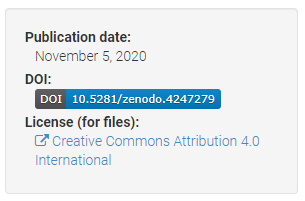

When publishing a notebook that relies on large scientific datasets on Harbor, it is possible to store the data on Zenodo and download the content in a notebook such as this one. This notebook and the associated python file `zenodo_dl.py` serve as an example on how to do so. Note that this module relies on the following python packages being installed: `requests` and `tqdm`. You can install these either via pip or conda.

First, we import the module, which contains the functions needed for downloading from a DOI:

In [1]:
import zenodo_dl as zdl

Now all we have to do is call `download_from_doi` and this notebook will download the files for the latest version corresponding to that DOI::

In [2]:
file_names = zdl.download_from_doi("10.5281/zenodo.4247279")

Fetching 'Kymograph of Cas9 binding to λ-DNA under tension'


Download cas9_kymo_compressed.h5:   0%|          | 0.00/16.0M [00:00<?, ?iB/s]

Verifying hash cas9_kymo_compressed.h5:   0%|          | 0.00/16.0M [00:00<?, ?iB/s]

Note that it will download the file, and then check it against the MD5 hash published on Zenodo, to make sure that the file was downloaded correctly.
When attempting to download the file again, the command will detect that the file has already been downloaded and not download it again:

In [3]:
file_names = zdl.download_from_doi("10.5281/zenodo.4247279")

Fetching 'Kymograph of Cas9 binding to λ-DNA under tension'


Verifying hash cas9_kymo_compressed.h5:   0%|          | 0.00/16.0M [00:00<?, ?iB/s]

File already exists and will not be downloaded again.


The `download_from_doi` function returns a list of file_names which can be used directly to download the datasets. Let's load and plot the dataset we just downloaded:

In [5]:
#import lumicks.pylake as lk
import matplotlib.pyplot as plt

file = lk.File(file_names[0])
key, kymo = file.kymos.popitem()

plt.figure()
ax1 = plt.subplot(2, 1, 1)
kymo.plot_green(vmax=4, aspect="auto")  # We use aspect="auto" because otherwise the kymo would be thin
ax2 = plt.subplot(2, 1, 2, sharex = ax1)
plt.xlim(ax1.get_xlim())
file["Force LF"]["Force 1x"].plot()
plt.tight_layout()
plt.show()

NameError: name 'lk' is not defined